# 5. Geospatial python

Because of the wide array (pun intended) of open source data science modules that are accessible with python, it has emerged as a flagship language for processing, analyzing, and visualizing geospatial data. There are several key geospatial packages available in python: 

* [Geopandas](https://geopandas.org/en/stable/) - processing vector data (e.g. shapfiles, `.GeoJSON`, `.KML`, see [here](https://gdal.org/en/stable/drivers/vector/index.html) for a full list of geospatial vector filetypes)
* [Rasterio](https://rasterio.readthedocs.io/en/stable/) - processing raster data (e.g. satellite imagery in `.tif` or `.tiff` format)
* [Xarray](https://docs.xarray.dev/) - multidimensional array analysis (e.g. time series gridded or satellite datasets in `.nc` or `.hdf` format)
* [GDAL](https://gdal.org/) - the key library (originally written in C and C++) that underscores most of the raster and vector processing operations in the above libraries, as well as GUI-based GIS software (ArcMap, QGIS, Google Earth/Maps, etc)


1. Geopandas  
   1. Data loading and filtering using pandas syntax   
   2. Map-based plotting  
   3. Geospatial operations  
   4. Spatial indexing  
   5. Rasterising vector features

2. Rasterio   
   1. Raster file formats  
   2. Basic plotting  
   3. Coordinate reference systems  
   4. Warping and transforming rasters  
   5. Virtual rasters  
   6. Analysis with rasterio and numpy  
   7. Using the rio command line  

3. Xarray  
   1. NetCDF and multidimensional datasets  
   2. Aggregation and grouping  
   3. Rioxarray for working with rasters  
   4. Xarray-spatial  
      1. DEM analysis  
      2. Remote sensing indices  

4. Scipy  
   1. Morphology  
   2. Missing data interpolation

5. Earth Engine  
   1. Accessing with python 

## Geopandas

Remember `pandas` from last module? Enter `geopandas` - a natural geospatial extension to store tabular vector data (think points, lines, and polygons) and simplify operations by keeping with pandas-like syntax. 

Let's load the same `stations.csv` file and convert it from a `pandas.DataFrame` to a `geopandas.GeoDataFrame`:

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/py4wrds/py4wrds/refs/heads/module-4/data/gwl/stations.csv"
df  = pd.read_csv(url)

In [3]:
df.head()

,STN_ID,SITE_CODE,SWN,WELL_NAME,LATITUDE,LONGITUDE,WLM_METHOD,WLM_ACC,BASIN_CODE,BASIN_NAME,COUNTY_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,ZIP_CODE
0,51445,320000N1140000W001,NaN,Bay Ridge,35.5604,-121.755,USGS quad,Unknown,NaN,NaN,Monterey,NaN,Residential,Part of a nested/multi-completion well,NaN,92154
1,25067,325450N1171061W001,19S02W05K003S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,92154
2,25068,325450N1171061W002,19S02W05K004S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,92154
3,39833,325450N1171061W003,19S02W05K005S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,92154
4,25069,325450N1171061W004,19S02W05K006S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,92154


In [4]:
# Create a GeoDataFrame from the DataFrame

import geopandas as gp

stn_gdf = gp.GeoDataFrame(df, 
    geometry=gp.points_from_xy(df['LONGITUDE'], df['LATITUDE']),
    crs="EPSG:4326"  # Set the coordinate reference system (CRS)
)

<Axes: >

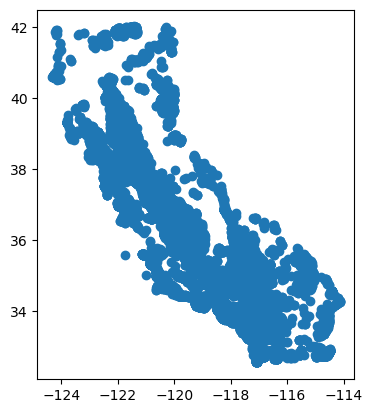

In [5]:
# Plot our results:
stn_gdf.plot()

When printed, the tabular data is identical, and all `pandas`-like syntax can be used to sort and filter data:

['Monterey' 'San Diego' 'Imperial' 'Riverside' 'Orange' 'Kern'
 'Los Angeles' 'San Bernardino' 'Ventura' 'Santa Barbara' 'Alameda'
 'San Luis Obispo' 'Amador' 'Alpine' 'Tulare' 'Inyo' 'Fresno' 'Kings'
 'Merced' 'San Benito' 'San Joaquin' 'Glenn' 'Madera' 'Santa Cruz'
 'Santa Clara' 'Plumas' 'Stanislaus' 'San Mateo' 'Mono' 'Mariposa'
 'San Francisco' 'Contra Costa' 'Tuolumne' 'Marin' 'Calaveras' 'Sonoma'
 'Sacramento' 'Sutter' 'Solano' 'Napa' 'Placer' 'Yolo' 'Lake' 'Colusa'
 'El Dorado' 'Mendocino' 'Yuba' 'Butte' 'Nevada' 'Sierra' 'Lassen'
 'Tehama' 'Shasta' 'Humboldt' 'Modoc' 'Siskiyou' 'Del Norte' 'Klamath, OR']


<Axes: >

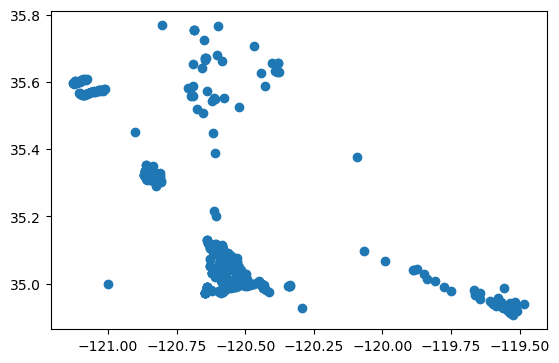

In [6]:
# Get unique county names
print(stn_gdf['COUNTY_NAME'].unique())
# Plotting all stations in SLO county only 
stn_gdf[stn_gdf['COUNTY_NAME'] == 'San Luis Obispo'].plot()

### Reading and writing files

Geopandas excels at making it easy to read and write vector files of several formats, which facilitates conversions and interoperability. 

simply `import geopandas as gp` and then read any common vector file format with the `gp.read_file('filename')` function, which works for common formats such as `.shp` (and supporting `.dbf` and `.shx` files), `kml`, `kmz`, `geojson`, etc..

In [7]:
# Read a geojson file
url = 'https://raw.githubusercontent.com/scottpham/california-counties/refs/heads/master/caCountiesTopo.json'
gdf = gp.read_file(url)
gdf.head()

,id,name,fullName,areaLand,geometry
0,06091,Sierra,Sierra County,2468686345,"POLYGON ((-120.14666 39.70738, -120.13527 39.7..."
1,06067,Sacramento,Sacramento County,2499176690,"POLYGON ((-121.14147 38.7118, -121.14043 38.71..."
2,06083,Santa Barbara,Santa Barbara County,7083926262,"MULTIPOLYGON (((-119.46758 34.06296, -119.4862..."
3,06009,Calaveras,Calaveras County,2641819811,"POLYGON ((-120.07212 38.50985, -120.07212 38.5..."
4,06111,Ventura,Ventura County,4773381212,"MULTIPOLYGON (((-119.63631 33.27314, -119.6363..."


<Axes: >

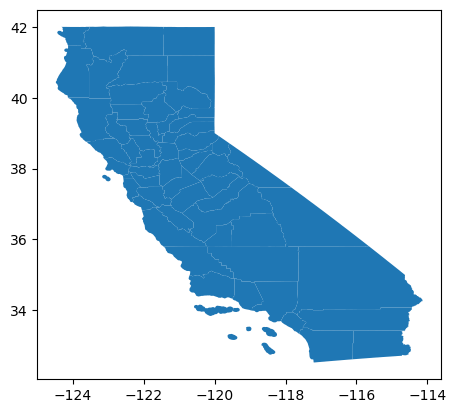

In [8]:
gdf.plot()

To write files, simply use the syntax: `gdf.to_file("path/to/out_file.geojson")` syntax. We recommend storing files as `.geojson` due to readability and simplicity to store and retrieve. 

In [9]:
gdf.to_file("ca_counties.geojson")

/Users/aakashahamed/anaconda3/envs/py4wrds/lib/python3.12/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


We received a warning that our CRS was not defined. We can define it using `gdf.set_crs('epsg:4236')`. Similar to other `DataFrame` and `pandas`-like operations, we must specify the `inplace = True` argument: 

In [10]:
gdf.set_crs('epsg:4326', inplace = True)
gdf.to_file("ca_counties.geojson")

In [11]:
# verify that file was written in our current directory: 
import os
[x for x in os.listdir(os.getcwd()) if 'geojson' in x]

['ca_counties.geojson']

### Managing Projections

We can inspect the [coordinate system](https://en.wikipedia.org/wiki/Spatial_reference_system) by using the `gdf.crs` syntax: 

In [12]:
# Geographic CRS example:
stn_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Reprojections

Let's reproject the geodataframe into a projected CRS for California - UTM Zone 10 N, which is `epsg:32611`: 

In [13]:
gdf_rpj = gdf.to_crs('epsg:32611')
gdf_rpj.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

the `estimate_utm_crs()` function may be convenient for going between geographic and projected CRS: df.estimate_utm_crs() 

In [14]:
gdf.estimate_utm_crs() 

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Geometric Operations

We can easily calculate geometry properties such as area, centroids, bounds, and distances using geopandas.

#### Calculating Areas

In [15]:
# Calculate area for each polygon in a UTM CRS
# Note - the units depend on the coordinate system, 
# Be sure to reproject appropriately and perform conversions

gdf_rpj['area_sqkm'] = gdf_rpj.area * 1e-6 # Sq m to sq km

In [16]:
gdf_rpj.head()

,id,name,fullName,areaLand,geometry,area_sqkm
0,06091,Sierra,Sierra County,2468686345,"POLYGON ((230234.045 4400014.851, 231214.129 4...",2496.006148
1,06067,Sacramento,Sacramento County,2499176690,"POLYGON ((139863.9 4292944.074, 139953.953 429...",2581.626193
2,06083,Santa Barbara,Santa Barbara County,7083926262,"MULTIPOLYGON (((272266.348 3771884.654, 270377...",9824.734752
3,06009,Calaveras,Calaveras County,2641819811,"POLYGON ((232124.629 4266859.975, 232121.112 4...",2690.216760
4,06111,Ventura,Ventura County,4773381212,"MULTIPOLYGON (((254453.527 3684668.544, 254474...",5720.357241


#### Centroids

Calculating centroids can be done with the `gdf.centroid` function:

0    POINT (198006.615 4387129.627)
1    POINT (120808.828 4264588.936)
2    POINT (221896.529 3825924.123)
3    POINT (188733.092 4234478.553)
4    POINT (304429.146 3803690.027)
dtype: geometry


<Axes: >

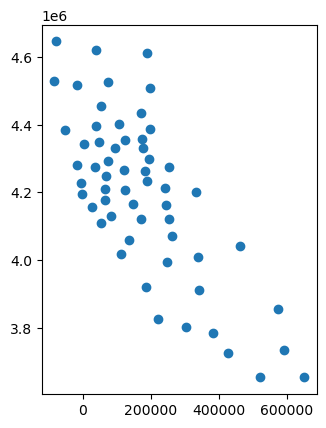

In [17]:
print(gdf_rpj.centroid.head())
gdf_rpj.centroid.plot()

#### Boundaries

Similarly, boundaries can be obtained with the `gdf.boundary` function: 

0    LINESTRING (-120.14666 39.70738, -120.13527 39...
1    LINESTRING (-121.14147 38.7118, -121.14043 38....
2    MULTILINESTRING ((-119.46758 34.06296, -119.48...
3    LINESTRING (-120.07212 38.50985, -120.07212 38...
4    MULTILINESTRING ((-119.63631 33.27314, -119.63...
dtype: geometry


<Axes: >

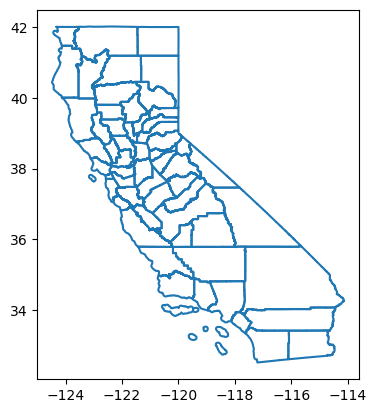

In [18]:
# Get the boundary of each polygon
print(gdf.boundary.head())
gdf.boundary.plot()

#### Distances

Similarly, distances between two points can be computed with the `distance` function: 

Let's calculate the distance between each of the stations in our dataset

<Axes: >

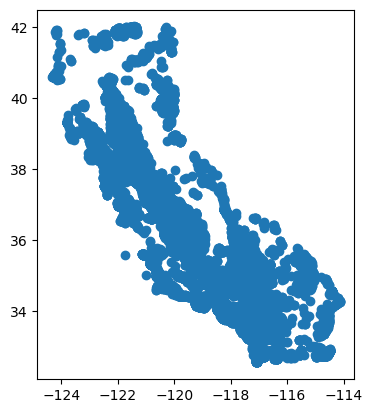

In [19]:
stn_gdf.plot()

In [20]:
# Reproject to UTM zone 11N
stn_gdf.to_crs(stn_gdf.estimate_utm_crs(), inplace = True)

# calculate distance between each station from the first station
stn_gdf['dist_from_stn_1'] = stn_gdf.distance(stn_gdf.iloc[0].geometry)

Text(0.5, 1.0, 'dist from 0th station')

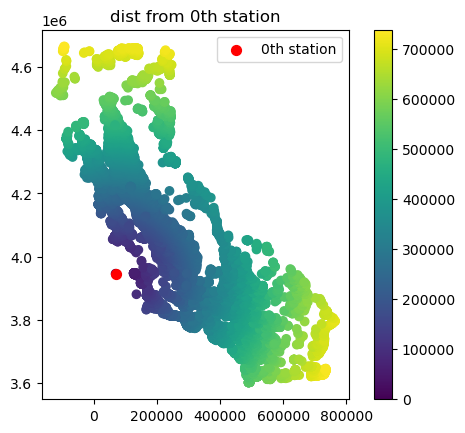

In [21]:
# Plot stations, colored by distance 
ax = stn_gdf.plot(column = 'dist_from_stn_1', legend = True)
# Plot the first station 
stn_gdf.loc[[0],'geometry'].plot(markersize = 50,color = 'red', ax = ax, label = '0th station')
# add a legend a title 
ax.legend()
ax.set_title('dist from 0th station')

### Plotting 

Just above we see an example of how to color a `GeoDataFrame` by a column, by specifying the `column = 'column_name'` argument into `gdf.plot()`. 

We can create interactive plots with the `gdf.explore()` funtion: 

In [22]:
slo_gdf = stn_gdf[stn_gdf['COUNTY_NAME'] == 'San Luis Obispo']

slo_gdf.explore(legend=False)

### Spatial Operations 

Geopandas makes it easy to perform basic spatial operations such as Buffers, Convex Hull, and Spatial Joins

#### Buffer

<Axes: >

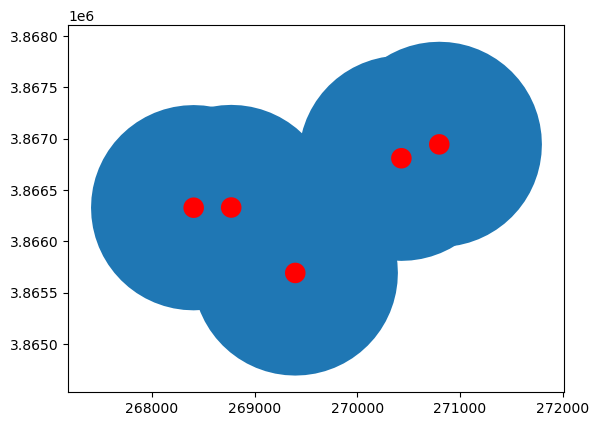

In [23]:
# Apply a 500m buffer to the first 5 points in the SLO well data 
ax = slo_gdf[:5].buffer(1000).plot()
# Plot the same 5 but with a smaller (50m) buffer 
slo_gdf[:5].buffer(100).plot(ax = ax, color = 'red')

#### Convex Hull

Text(0.5, 1.0, 'Convex Hull of CA Counties')

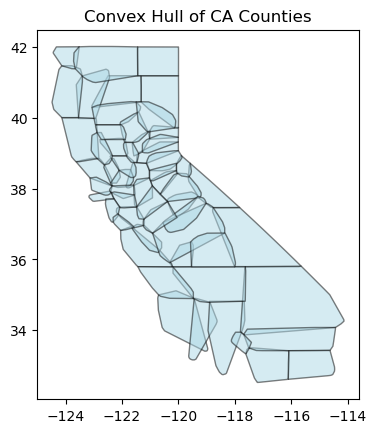

In [24]:
gdf["convex_hull"] = gdf.convex_hull
# Plot the convex hulls
ax = gdf["convex_hull"].plot(alpha=0.5, color="lightblue", edgecolor="black")
ax.set_title("Convex Hull of CA Counties")

#### Spatial Union

/Users/aakashahamed/anaconda3/envs/py4wrds/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

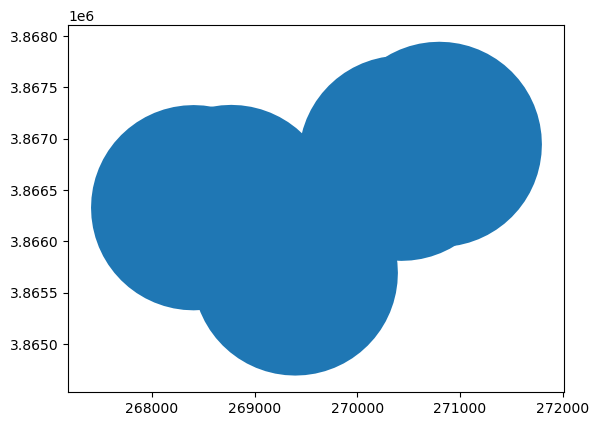

In [25]:
slo_gdf['buf_geom'] = slo_gdf[:5].buffer(1000)
slo_gdf['buf_geom'].plot()

In [26]:
slo_gdf['buf_geom'].head()

14732    POLYGON ((270395.988 3865693.001, 270391.173 3...
14834    POLYGON ((269406.21 3866328.542, 269401.395 38...
14835    POLYGON ((269772.007 3866330.38, 269767.192 38...
14924    POLYGON ((271429.923 3866810.295, 271425.107 3...
14942    POLYGON ((271799.033 3866945.332, 271794.218 3...
Name: buf_geom, dtype: geometry

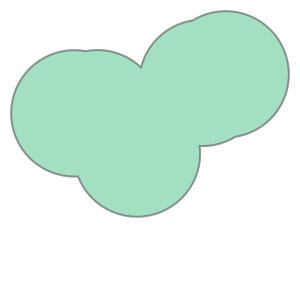

In [27]:
slo_gdf['buf_geom'].union_all()

### Spatial Joins, Queries, and Relations

#### Intersections
To check for spatial intersection between two datasets, we can use the `intersection` function: 

<Axes: >

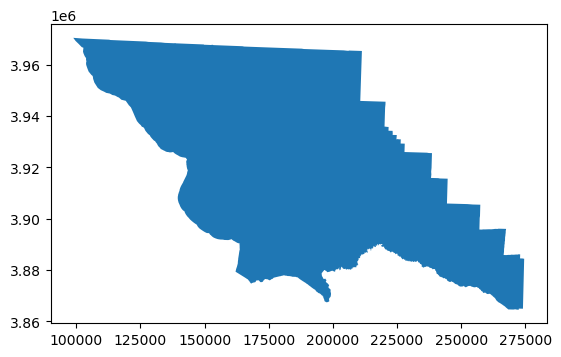

In [28]:
# Check which buffered boroughs intersect with SLO's geometry
slo_co = gdf[gdf['name'] == 'San Luis Obispo'].to_crs(gdf.estimate_utm_crs())

slo_co.plot()

In [29]:
slo_co_stns = gp.overlay(stn_gdf, slo_co, how='intersection')

<Axes: >

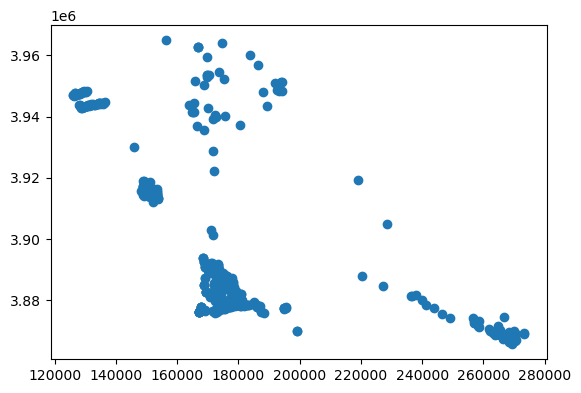

In [30]:
slo_co_stns.plot()

<Axes: >

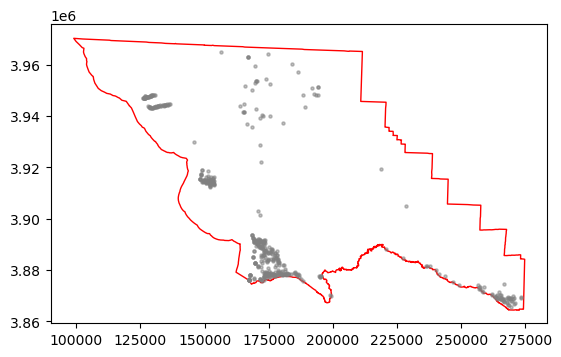

In [31]:
ax = slo_co.plot(color = 'white', edgecolor = 'red')
slo_co_stns.plot(alpha = 0.5, markersize = 5, color = 'gray', label = 'stations', ax = ax)

## Rasterio

Rasterio is a powerful library for working with [raster data](https://en.wikipedia.org/wiki/Raster_graphics) (think: images or grids of numbers with pixels) written on top of the Geospatial Data Abstraction Library [(GDAL)](https://gdal.org/), making it easier to perform a wide variety of raster processing and visualization tasks. 

### Reading and inspecting data 

We can open geospatial raster datasets (e.g. `.tif` and `.tiff` files) using the `.open` function:

In [32]:
import rasterio as rio

raster_path = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
src = rio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


Notice that we are reading a file from a URL here, but this function works identically for local files. 

Once a dataset has been opened, we can inspect lots of useful information, including:
* Projection information
* Bounding box
* Spatial resolution
* Dimensions - width / height
* Other metadata

In [33]:
# Inspect crs
src.crs

CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]')

In [34]:
# Inspect metadata
src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

In [35]:
# Inspect spatial res
src.res

(90.0, 89.99579177642138)

In [36]:
# Inspect dimensions or width / height 
print(src.shape, src.width, src.height)

(3113, 4269) 4269 3113


In [37]:
# Inspect bounding box
src.bounds

BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)

### Plotting and visualizing

We can use the `read` function to read raster bands from `.tiff` or `.tif` files as `numpy` arrays, and then make use the `imshow` function from the trusty module `matplotlib`! 

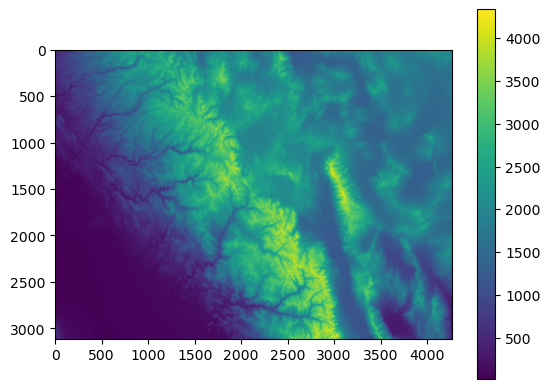

In [38]:
import numpy as np
import matplotlib.pyplot as plt

arr = src.read(1)
plt.imshow(arr); plt.colorbar()

In the above code, we are reading the first band from the raster using `src.read(1)`. For multiband rasters, we can read the other bands using the same syntax. 

Note that **this method does not preserve any projection information in the plot** - the x and y axes are just the number of rows / cols in the dataset. 

If we want to preserve any geospatial coordinate information, we can use the rasterio plotting module:

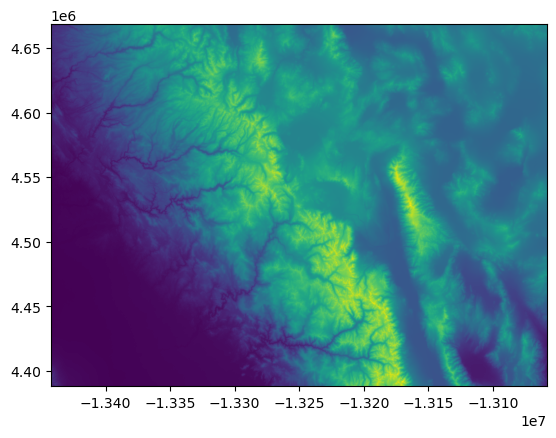

<Axes: >

In [39]:
import rasterio.plot 

rio.plot.show(src)

#### Formatting Plots

We can leverage [matplotlib's functionality](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html) to style our plots, including adding titles and choosing colormaps:

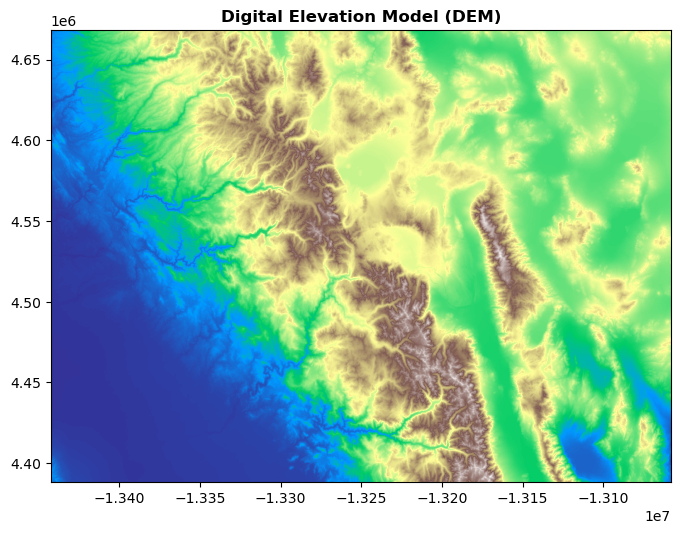

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
plt.show()

#### Plotting vector and raster data

In [41]:
Tuolumne_co = gdf[gdf['name'] == 'Tuolumne']
Tuolumne_co.to_crs(src.crs, inplace = True)

/Users/aakashahamed/anaconda3/envs/py4wrds/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: title={'center': 'Digital Elevation Model (DEM) and Tuolumne co'}>

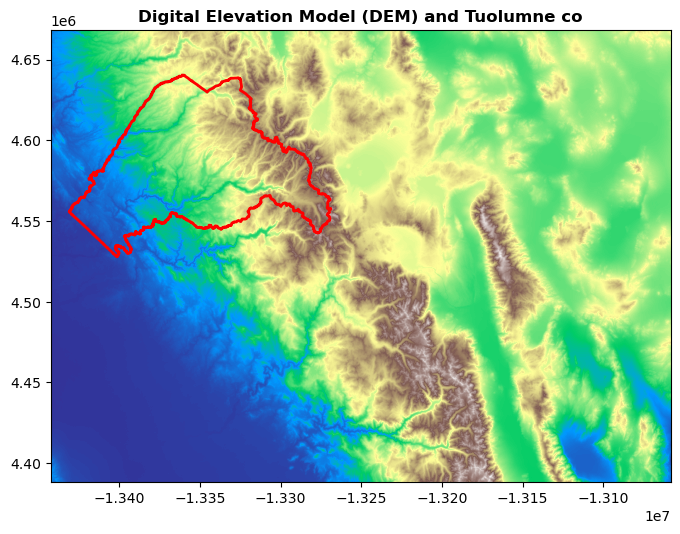

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM) and Tuolumne co")
Tuolumne_co.plot(ax=ax, edgecolor="red", facecolor="none", lw=2)

### Clipping raster to vector data

A common task involves clipping a raster to a vector dataset. We can use `rasterio.mask` to clip the DEM above to the boundary of Tuolumne county, defined in the `ca_counties.geojson` file: 

In [43]:
import rasterio.mask 

# Read raster 
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
src = rio.open(raster_path)

# Read shape, isolate Tuolumne
shp_geom = gp.read_file("ca_counties.geojson")
Tuolumne_co = shp_geom[shp_geom['name'] == 'Tuolumne']

# Ensure CRS are consistent
Tuolumne_co.to_crs(src.crs, inplace = True)

# Perform clip 
out_image, out_transform = rio.mask.mask(src, Tuolumne_co['geometry'], crop=True)

/Users/aakashahamed/anaconda3/envs/py4wrds/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


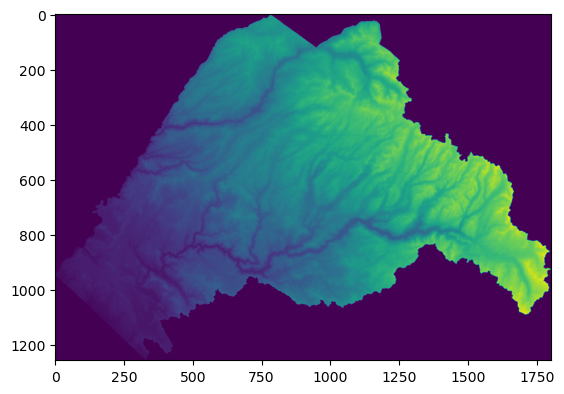

In [44]:
# Verify results:

rasterio.plot.show(out_image[0,:,:]);

Notice that rasterio returns by default an array with 3 dimensions (`out_image`), for which we have selected the first band manually. This functionality exists to deal with multiband rasters. 

### Writing rasters

Let's save the raster we just clipped

In [45]:
# Set the output file 
output_raster_path = "./data/clipped.tif"

# Extract some information from the image we processed 
kwargs = src.meta
kwargs.update(
    height=out_image.shape[1],
    width=out_image.shape[2],
    count=out_image.shape[0],
    dtype=out_image.dtype,
    crs=src.crs)

# Save
with rasterio.open(output_raster_path, "w", **kwargs) as dst:
    dst.write(out_image)

print(f"Raster data has been written to {output_raster_path}")


Raster data has been written to ./data/clipped.tif


### Reprojecting Rasters

We use the `rasterio.warp` module to change raster projections. 

Let's reproject our clipped raster to the WGS 84 (EPSG:3857) CRS and save the reprojected raster to a new file.

In [46]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

# Set output filename 
raster_path = "./data/clipped.tif"
dst_crs = "EPSG:4326"  # WGS 84
output_reprojected_path = "./data/clipped_reprojected.tif"

with rasterio.open(raster_path) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)

    profile = src.profile
    profile.update(crs=dst_crs, transform=transform, width=width, height=height)

    with rasterio.open(output_reprojected_path, "w", **profile) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,
            )
print(f"Reprojected raster saved at {output_reprojected_path}")


Reprojected raster saved at ./data/clipped_reprojected.tif


### Multiband Rasters 

Satellite data is generally composed of a number of [spectral bands](https://landsat.gsfc.nasa.gov/satellites/landsat-8/landsat-8-bands/). Each band measures the light reflected between two wavelengths (hence the term 'band'). Rasterio allows us to work with these bands individually and in concert. 

For example, NASA's Landsat Satellites record the following bands: 

| Name   | Wavelength       | Description                                        |
|--------|------------------|----------------------------------------------------|
| SR_B1  | 0.435-0.451 μm   | Band 1 (ultra blue, coastal aerosol) surface reflectance |
| SR_B2  | 0.452-0.512 μm   | Band 2 (blue) surface reflectance                   |
| SR_B3  | 0.533-0.590 μm   | Band 3 (green) surface reflectance                  |
| SR_B4  | 0.636-0.673 μm   | Band 4 (red) surface reflectance                    |
| SR_B5  | 0.851-0.879 μm   | Band 5 (near infrared) surface reflectance          |
| SR_B6  | 1.566-1.651 μm   | Band 6 (shortwave infrared 1) surface reflectance   |
| SR_B7  | 2.107-2.294 μm   | Band 7 (shortwave infrared 2) surface reflectance   |

Let's plot all the bands in this raster

In [47]:
# Read multiband Landsat image: 
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
src = rasterio.open(raster_path)
print(src)

# Specify band names: 
band_names = ["Coastal Aerosol", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif' mode='r'>


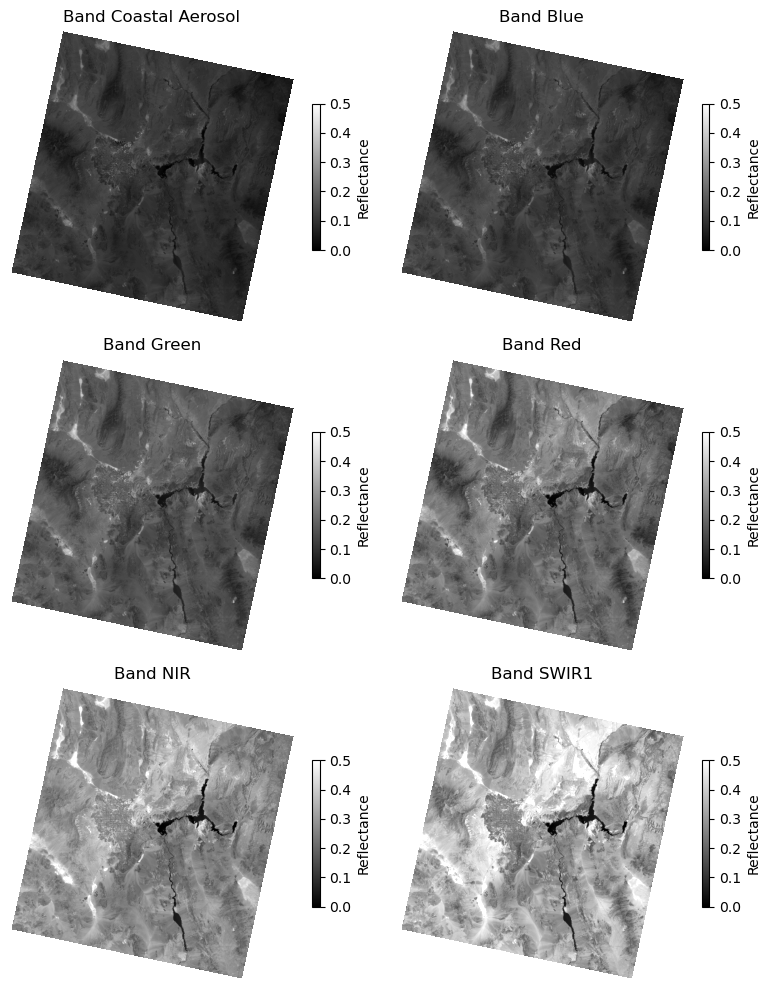

In [48]:
# Plot raster: 

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

for band in range(1, src.count):
    data = src.read(band)
    ax = axes[band - 1]
    im = ax.imshow(data, cmap="gray", vmin=0, vmax=0.5)
    ax.set_title(f"Band {band_names[band - 1]}")
    ax.axis("off")
    fig.colorbar(im, ax=ax, label="Reflectance", shrink=0.5)

plt.tight_layout()
plt.show()


### True color image

In order to visualize a true color image, we need to visualize band 2 (blue), band 3 (green), and band 4 (red) in the same image: 

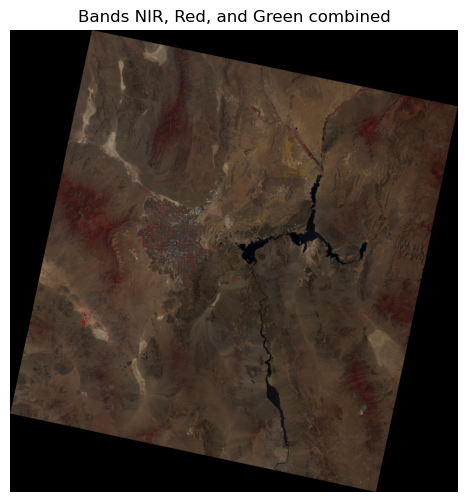

In [49]:
nir_band = src.read(5)
red_band = src.read(4)
green_band = src.read(3)

# Stack the bands into a single array
rgb = np.dstack((nir_band, red_band, green_band)).clip(0, 1)

# Plot the stacked array
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.axis("off")
plt.title("Bands NIR, Red, and Green combined")
plt.show()

#### Band math: Calculating NDVI 

A common metric that we can derive from multiple bands is [Normalized Difference Vegetation Index (NDVI)](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index), which is defined as: 

$$NDVI = (NIR - Red) / (NIR + Red)$$

/var/folders/py/9t078qzs52x65tkpvg23_4mc0000gn/T/ipykernel_80421/2399537775.py:2: RuntimeWarning: invalid value encountered in subtract
  ndvi = (nir_band - red_band) / (nir_band + red_band)


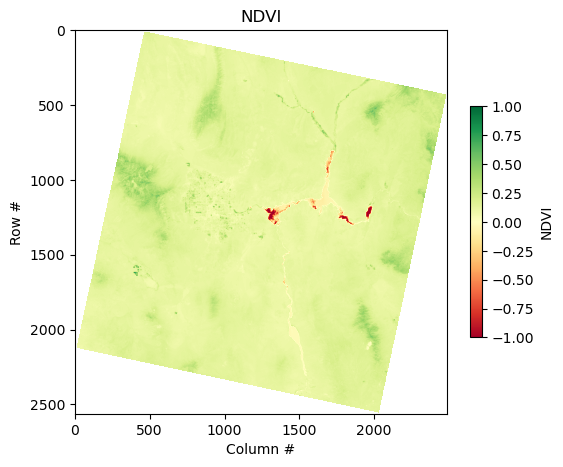

In [50]:
# NDVI Calculation: NDVI = (NIR - Red) / (NIR + Red)
ndvi = (nir_band - red_band) / (nir_band + red_band)
ndvi = ndvi.clip(-1, 1)

plt.figure(figsize=(6, 6))
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI", shrink=0.5)
plt.title("NDVI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

## Xarray

Xarray makes working with labelled multi-dimensional arrays in Python simple, efficient, and fun!

#### Xarray data representation
Xarray represents stacks of images as 'cubes', where two axes represent the latitude and longitude coordinates of spatial data, and a third axis represents time. Note that an xarray dataset can contain more than one variable! 

![xarray](https://docs.xarray.dev/en/stable/_images/dataset-diagram.png)